In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
iris=load_iris()

 **EDA**

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data[0]


array([5.1, 3.5, 1.4, 0.2])

In [ ]:

iris.target_names[0:9]
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target


In [ ]:

iris.feature_names
iris.target
# features=['DESCR','feature_names','data','target']
X=df.drop(['target'],axis=1)
Y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)



In [ ]:
print(len(X_train))
len(X_test)

120


30

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
reg.score(X_test,y_test)


0.9666666666666667

In [ ]:
y_pred=reg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[ 5,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 15]])

Text(95.72222222222221, 0.5, 'Truth')

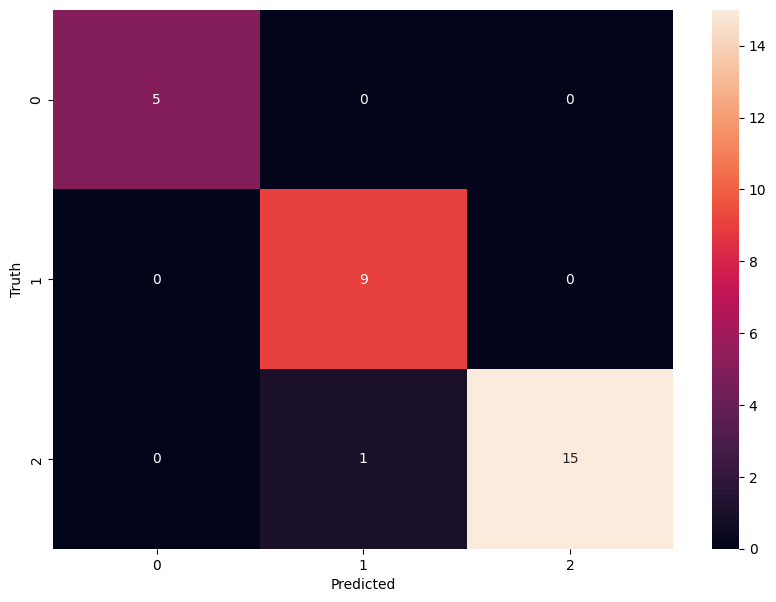

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis = 'columns')

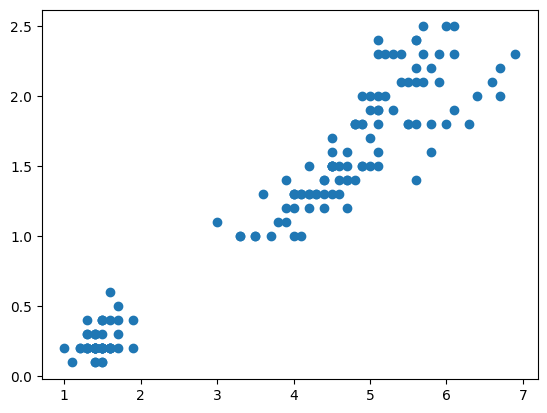

In [ ]:
plt.scatter(df[	'petal length (cm)'],df['petal width (cm)'])

In [ ]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['cluster'] = y_pred
df

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


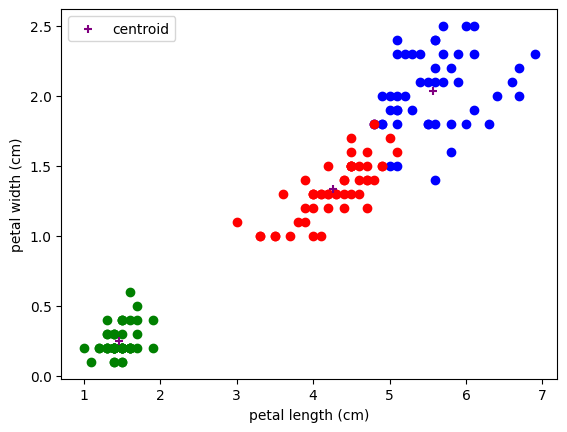

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
print()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.legend()